In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
landing = pd.read_csv("/Users/lijinpeng/Desktop/MDoyster/data/Oyster/FOSS_landings.csv")
aquaculture = pd.read_csv("/Users/lijinpeng/Desktop/MDoyster/data/Oyster/aquaculture_midatlantic.csv")

In [4]:
# Check data types of all columns
print(landing.dtypes)

Year                int64
State              object
NMFS Name          object
Pounds             object
Metric Tons        object
Dollars            object
Confidentiality    object
Collection         object
Scientific Name    object
Tsn                 int64
Source             object
dtype: object


# 1. analyzed landings data
## 1. Clean the dataset

In [5]:
# strp whitespace from name
landing.columns = landing.columns.str.strip()

In [6]:
# remove commas and convert to numeric
landing['Metric Tons'] = landing['Metric Tons'].str.replace(',', '').astype(float)  
landing['Dollars'] = landing['Dollars'].str.replace(',', '').astype(float)


In [7]:
# Convert all column names to lowercase
landing.columns = (
  landing.columns
  .str.lower()
  .str.strip()  # Remove leading/trailing whitespace
  .str.replace(' ', '_')  # Replace spaces with underscores
  .str.replace('[^a-z0-9_]', '')  # Remove non-alphanumeric characters (except underscore)
  )

In [8]:
print(landing.head())

   year     state        nmfs_name     pounds  metric_tons     dollars  \
0  2023  MARYLAND  OYSTER, EASTERN  1,923,416        872.0  23652717.0   
1  2023  VIRGINIA  OYSTER, EASTERN  4,366,079       1980.0  47765014.0   
2  2022  MARYLAND  OYSTER, EASTERN  1,768,392        802.0  24741846.0   
3  2022  VIRGINIA  OYSTER, EASTERN  4,428,519       2009.0  32204135.0   
4  2021  MARYLAND  OYSTER, EASTERN  1,391,248        631.0  15403761.0   

  confidentiality  collection        scientific_name    tsn source  
0          Public  Commercial  Crassostrea virginica  79872  ACCSP  
1          Public  Commercial  Crassostrea virginica  79872  ACCSP  
2          Public  Commercial  Crassostrea virginica  79872  ACCSP  
3          Public  Commercial  Crassostrea virginica  79872  ACCSP  
4          Public  Commercial  Crassostrea virginica  79872  ACCSP  


## 2.Explore the "nmfs_name"

In [9]:
# View unique values in the NMFS Name column
unique_nmfs_names = landing['nmfs_name'].unique()
print(f"Unique NMFS Names: {unique_nmfs_names}")

# Count the number of unique values
nmfs_name_count = landing['nmfs_name'].nunique()
print(f"Number of unique NMFS Names: {nmfs_name_count}")


Unique NMFS Names: ['OYSTER, EASTERN']
Number of unique NMFS Names: 1


## 3. Analysis

In [10]:
# Group by year and state
grouped_tons = landing.groupby(['year','state'])[['metric_tons']].sum().reset_index()
grouped_dollars = landing.groupby(['year','state'])[['dollars']].sum().reset_index()

print(grouped_dollars)
print(grouped_tons)

     year       state     dollars
0    1950    MARYLAND   5520892.0
1    1950  NEW JERSEY   2897247.0
2    1950    VIRGINIA   5573880.0
3    1951    MARYLAND   6692360.0
4    1951  NEW JERSEY   2405681.0
..    ...         ...         ...
199  2021    VIRGINIA  30250151.0
200  2022    MARYLAND  24741846.0
201  2022    VIRGINIA  32204135.0
202  2023    MARYLAND  23652717.0
203  2023    VIRGINIA  47765014.0

[204 rows x 3 columns]
     year       state  metric_tons
0    1950    MARYLAND       6535.0
1    1950  NEW JERSEY       3285.0
2    1950    VIRGINIA       7052.0
3    1951    MARYLAND       6587.0
4    1951  NEW JERSEY       2613.0
..    ...         ...          ...
199  2021    VIRGINIA       1648.0
200  2022    MARYLAND        802.0
201  2022    VIRGINIA       2009.0
202  2023    MARYLAND        872.0
203  2023    VIRGINIA       1980.0

[204 rows x 3 columns]


In [16]:
# Filter data for Maryland
maryland_data = landing[landing['state'] == 'MARYLAND']

# Group by year and sum metric tons for Maryland
grouped_tons = maryland_data.groupby(['year'])[['metric_tons']].sum().reset_index()

# Find the lowest and highest values for Maryland
lowest = grouped_tons.loc[grouped_tons['metric_tons'].idxmin()]
highest = grouped_tons.loc[grouped_tons['metric_tons'].idxmax()]

# Calculate the percentage
percentage = (lowest['metric_tons'] / highest['metric_tons']) * 100

# Print results
print(f"Lowest value: {lowest['metric_tons']} in year {lowest['year']}")
print(f"Highest value: {highest['metric_tons']} in year {highest['year']}")
print(f"Lowest is {percentage:.2f}% of the highest.")

Lowest value: 19.0 in year 2004.0
Highest value: 9263.0 in year 1973.0
Lowest is 0.21% of the highest.


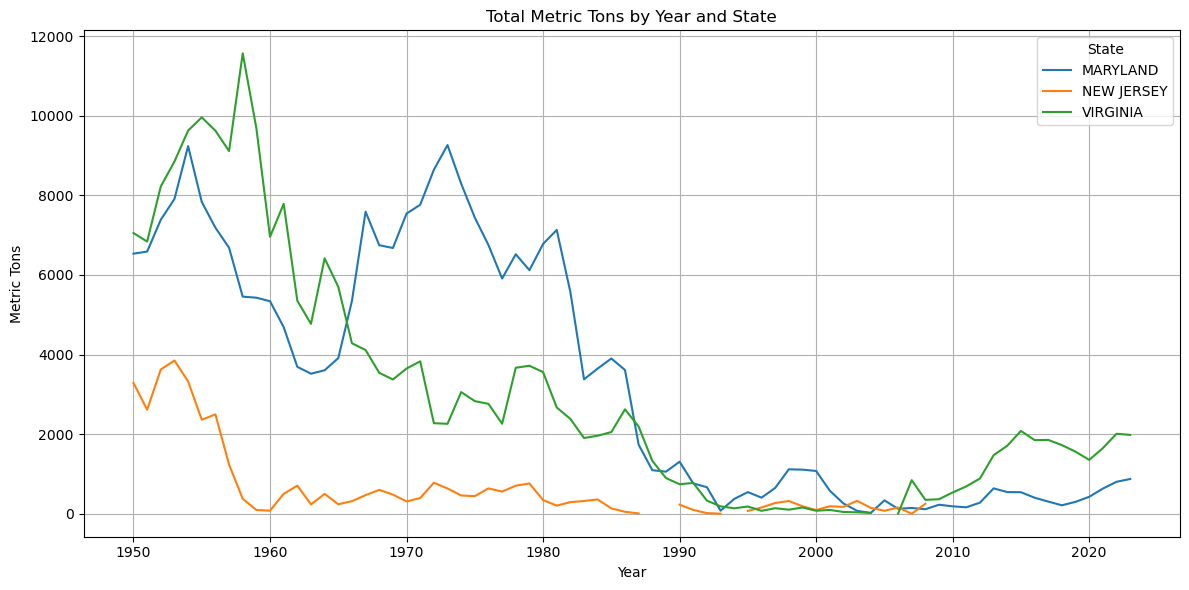

In [12]:
# Pivot data for easier plotting (years as x-axis, states as columns)
pivot_tons = grouped_tons.pivot(index='year', columns='state', values='metric_tons')

# Create the line chart
plt.figure(figsize=(12, 6))

# Plot each state as a separate line
for state in pivot_tons.columns:
    plt.plot(pivot_tons.index, pivot_tons[state], label=state)

# Customize the chart
plt.title('Total Metric Tons by Year and State')
plt.xlabel('Year')
plt.ylabel('Metric Tons')
plt.legend(title='State')
plt.grid(True)  # Optional: Add grid lines for better readability

# Step 5: Display the chart
plt.tight_layout()
plt.show()

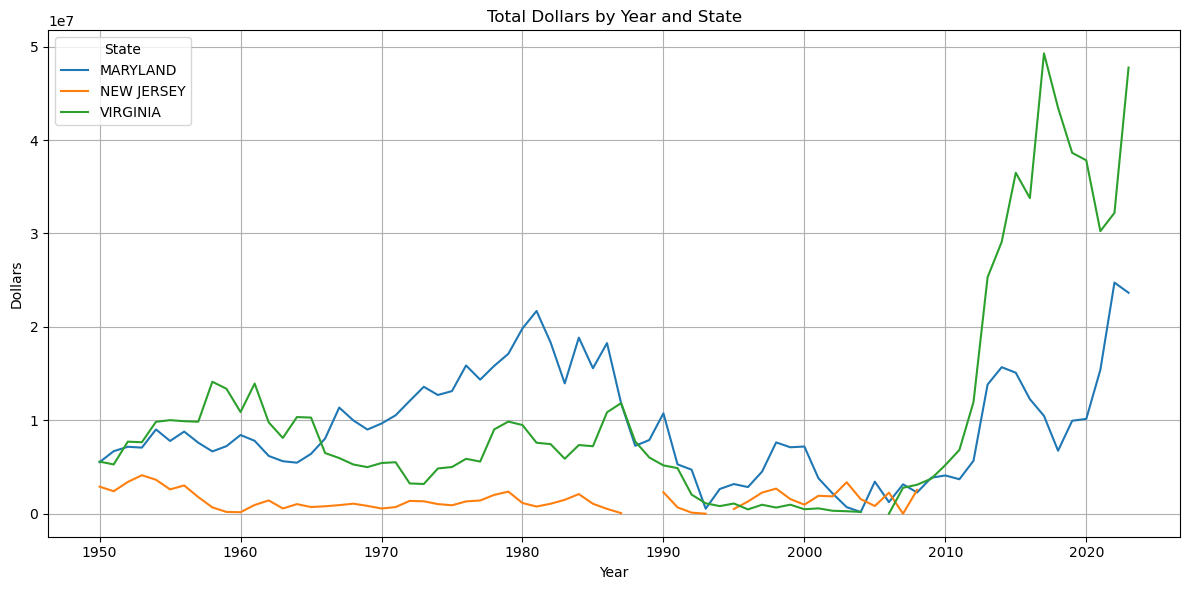

In [13]:
pivot_dollars = grouped_dollars.pivot(index='year',columns='state', values='dollars')

plt.figure(figsize=(12,6))

for state in pivot_dollars.columns:
  plt.plot(pivot_dollars.index, pivot_dollars[state], label=state)

plt.title('Total Dollars by Year and State')
plt.xlabel('Year')
plt.ylabel('Dollars')
plt.legend(title='State')
plt.grid(True)  # Optional: Add grid lines for better readability

# Step 5: Display the chart
plt.tight_layout()
plt.show()

# 2. Analyze aquaculture dara

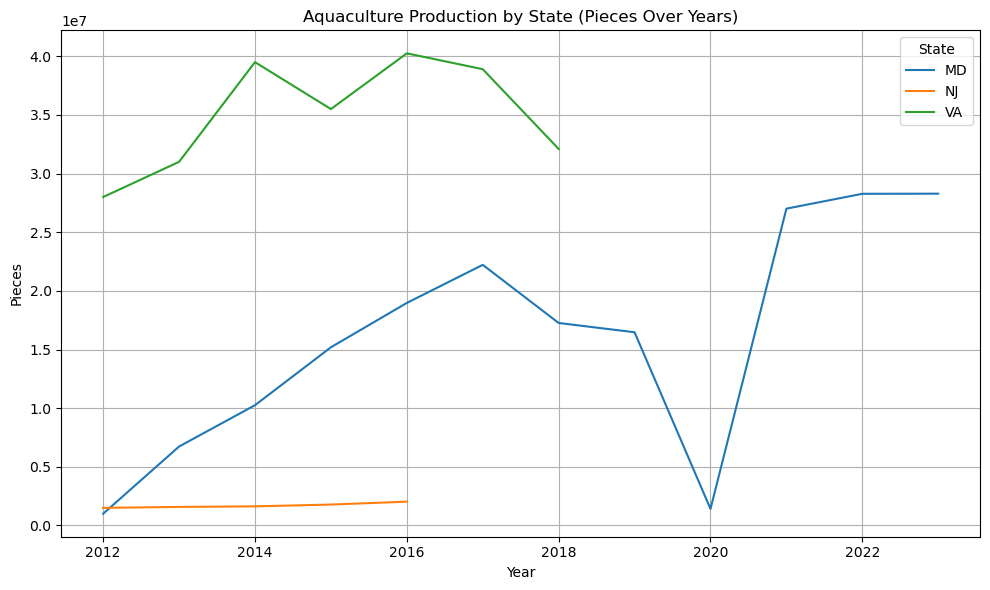

In [14]:

# Step 2: Ensure the column names are cleaned and standardized
aquaculture.columns = (
    aquaculture.columns
    .str.strip()  # Remove leading/trailing spaces
    .str.lower()  # Convert to lowercase
)

# Step 3: Convert 'pieces' to numeric, removing commas if necessary
aquaculture['pieces'] = aquaculture['pieces'].str.replace(',', '').astype(float)

# Step 4: Pivot the data for plotting
pivot_data = aquaculture.pivot(index='year', columns='state', values='pieces')

# Step 5: Create the line chart
plt.figure(figsize=(10, 6))

# Plot each state as a separate line
for state in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[state], label=state)

# Step 6: Customize the chart
plt.title('Aquaculture Production by State (Pieces Over Years)')
plt.xlabel('Year')
plt.ylabel('Pieces')
plt.legend(title='State')
plt.grid(True)
plt.tight_layout()

# Step 7: Display the chart
plt.show()
